### Sensibilidad al Error en las Observaciones

Figure saved as: 
 PDF: /home/jorge.gacitua/experimentos/L96_multiple_experiments/figures/Figure_AnalysisRMSE_Freq4_Den1.0_Type3_ObsErr25_NTemp3_NOGEC.pdf 
 PNG: /home/jorge.gacitua/experimentos/L96_multiple_experiments/figures/Figure_AnalysisRMSE_Freq4_Den1.0_Type3_ObsErr25_NTemp3_NOGEC.png


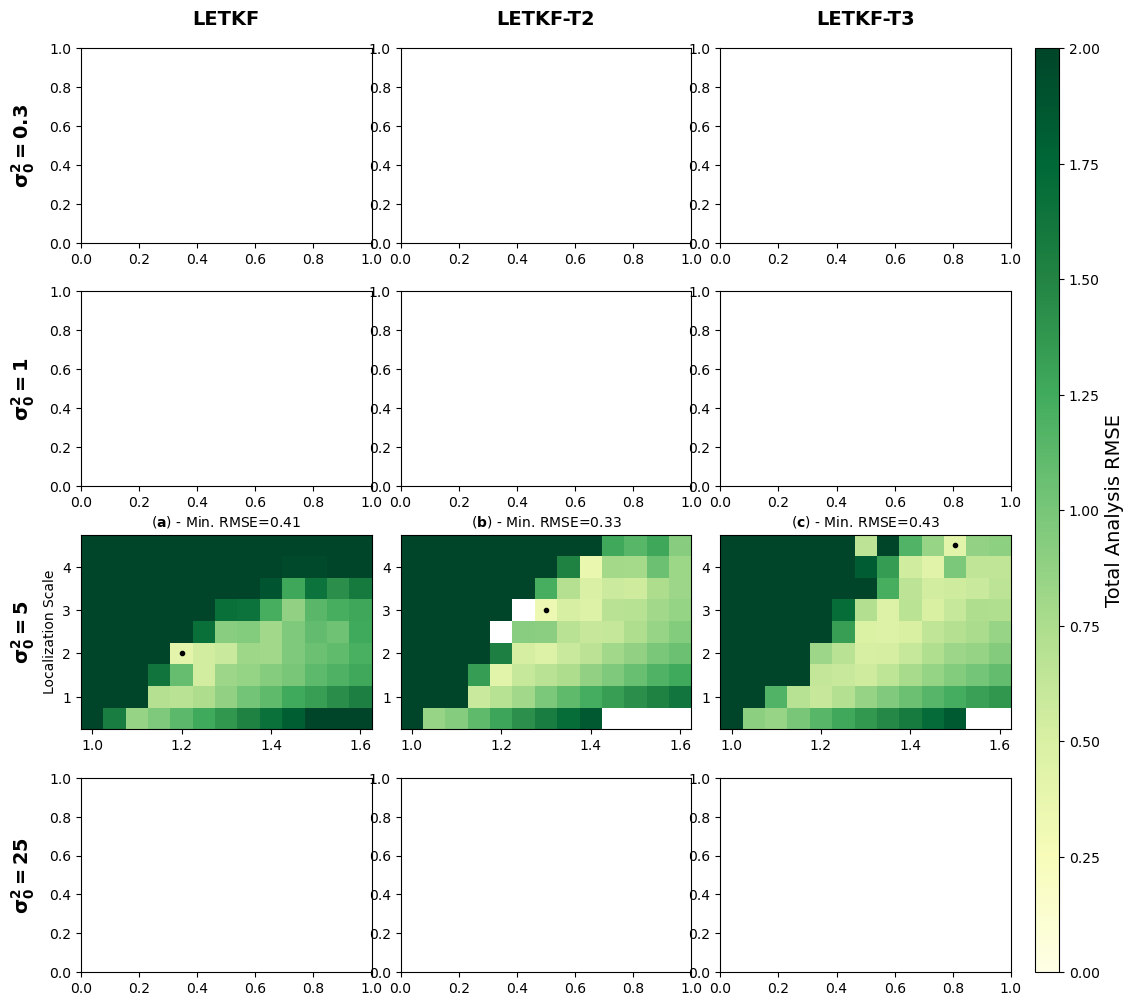

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import os
import common_function as cf
# Configuración
obs_errs = ['0.3', '1', '5', '25']
ntemps = [1, 2, 3]
labels = ['LETKF', 'LETKF-T2', 'LETKF-T3']
base_path  = '/home/jorge.gacitua/experimentos/L96_multiple_experiments/data/LETKF/'
output_dir = '/home/jorge.gacitua/experimentos/L96_multiple_experiments/figures'
nens = 20
freq = 4
den = 1.0
alpha = 2
gec = '_NOGEC'
fig, axes = plt.subplots(len(obs_errs), len(ntemps), figsize=(12, 12), 
                         sharex=False, sharey=False, 
                         gridspec_kw={'hspace': 0.25, 'wspace': 0.1})


cbar_ax = fig.add_axes([0.92, 0.11, 0.02, 0.77])  # x, y, width, height

vmin, vmax = 0, 2
panel_label_counter = 0

for i, obs in enumerate(obs_errs):
    for j, ntemp in enumerate(ntemps):
        #filename = f'ORIG_LETKF_Paper_Nature_Freq{freq}_Den{den}_Type3_ObsErr{obs}_Nens20_NTemp{ntemp}{gec}.npz'
        filename = f'LETKF_Paper_Nature_Freq{freq}_Den{den}_Type3_ObsErr{obs}_Nens{nens}_NTemp{ntemp}_alpha{alpha}{gec}.npz'
        filepath = os.path.join(base_path, filename)

        ax = axes[i, j]

        if os.path.exists(filepath):
            data = np.load(filepath, allow_pickle=True)
            #results = data['results']
            mult_inf_range = data['mult_inf_range']
            loc_scale_range = data['loc_scale_range']
            #print(data['AlphaTempList'])
            total_analysis_rmse = data['total_analysis_rmse']

            NormalEnd = 1 - data['NormalEnd']
            NormalEnd = NormalEnd.astype(bool)
            total_analysis_rmse[NormalEnd] = np.nan
            total_analysis_rmse = cf.outlier_rmse_filter( total_analysis_rmse )

            min_rmse = np.nanmin(total_analysis_rmse)
            idx_min = np.where(total_analysis_rmse == min_rmse)
            best_mult_inf = mult_inf_range[idx_min[0][0]]
            best_loc_scale = loc_scale_range[idx_min[1][0]]
 
            im = ax.pcolormesh(mult_inf_range, loc_scale_range, total_analysis_rmse.T, 
                               vmin=vmin, vmax=vmax, cmap='YlGn',edgecolors='lightgray',linewidth=0.001)
            ax.plot(best_mult_inf, best_loc_scale, 'k.', markersize=6)

            panel_label = rf"$\bf{{{chr(97 + panel_label_counter)}}}$"
            ax.set_title(f"({panel_label}) - Min. RMSE={min_rmse:.2f}", fontsize=10)
            panel_label_counter += 1

            if j == 0:
                ax.set_ylabel('Localization Scale', fontsize=10)
            if i == len(obs_errs) - 1:
                ax.set_xlabel('Multiplicative Inflation', fontsize=10)

for i, obs in enumerate(obs_errs):
    axes[i, 0].annotate(rf"$\bf{{\sigma^2_0 = {obs}}}$", xy=(-0.15, 0.5), xycoords='axes fraction',
                        rotation=90, va='center', ha='right', fontsize=14, weight='bold')
for j, t in enumerate(ntemps):
    axes[0, j].annotate(labels[j], xy=(0.5, 1.15), xycoords='axes fraction',
                        va='center', ha='center', fontsize=14, weight='bold')
cbar = fig.colorbar(im, cax=cbar_ax)
cbar.set_label('Total Analysis RMSE', fontsize=14)

os.makedirs(output_dir, exist_ok=True)
figname = f"Figure_AnalysisRMSE_Freq{freq}_Den{den}_Type3_ObsErr{obs}_NTemp{ntemp}{gec}"
output_pdf = os.path.join(output_dir, f"{figname}.pdf")
output_png = os.path.join(output_dir, f"{figname}.png")

plt.savefig(output_pdf, dpi=300, bbox_inches='tight', format='pdf')
plt.savefig(output_png, dpi=300, bbox_inches='tight', format='png')
#plt.show()

print(f"Figure saved as: \n PDF: {output_pdf} \n PNG: {output_png}")

### Sensibilidad al numero de Ensambles

/home/jorge.gacitua/experimentos/L96_multiple_experiments/data/LETKF/LETKF_Paper_Nature_Freq4_Den1.0_Type3_ObsErr5_Nens10_NTemp1_alpha2_NOGEC.npz
/home/jorge.gacitua/experimentos/L96_multiple_experiments/data/LETKF/LETKF_Paper_Nature_Freq4_Den1.0_Type3_ObsErr5_Nens10_NTemp2_alpha2_NOGEC.npz
/home/jorge.gacitua/experimentos/L96_multiple_experiments/data/LETKF/LETKF_Paper_Nature_Freq4_Den1.0_Type3_ObsErr5_Nens10_NTemp3_alpha2_NOGEC.npz
/home/jorge.gacitua/experimentos/L96_multiple_experiments/data/LETKF/LETKF_Paper_Nature_Freq4_Den1.0_Type3_ObsErr5_Nens20_NTemp1_alpha2_NOGEC.npz
/home/jorge.gacitua/experimentos/L96_multiple_experiments/data/LETKF/LETKF_Paper_Nature_Freq4_Den1.0_Type3_ObsErr5_Nens20_NTemp2_alpha2_NOGEC.npz
/home/jorge.gacitua/experimentos/L96_multiple_experiments/data/LETKF/LETKF_Paper_Nature_Freq4_Den1.0_Type3_ObsErr5_Nens20_NTemp3_alpha2_NOGEC.npz
/home/jorge.gacitua/experimentos/L96_multiple_experiments/data/LETKF/LETKF_Paper_Nature_Freq4_Den1.0_Type3_ObsErr5_Nens40_NT

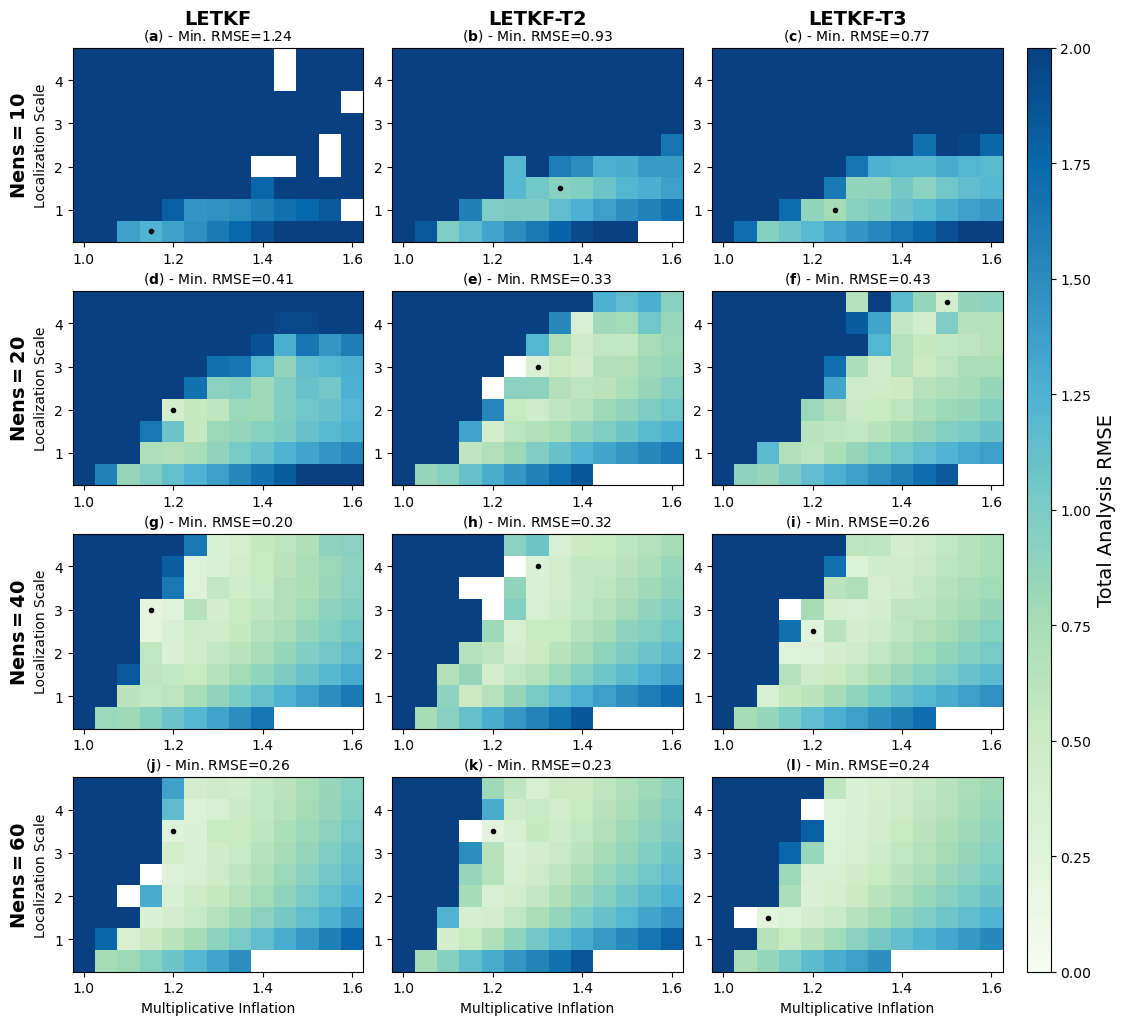

In [11]:
import matplotlib.pyplot as plt
import numpy as np
import os
import common_function as cf
# Configuración
ntemps = [1, 2, 3]
labels = ['LETKF', 'LETKF-T2', 'LETKF-T3']
nens = [10, 20, 40, 60]
base_path  = '/home/jorge.gacitua/experimentos/L96_multiple_experiments/data/LETKF/'
output_dir = '/home/jorge.gacitua/experimentos/L96_multiple_experiments/figures'
freq = 4
den = 1.0
alpha = 2
ObseErr = '5'
gec = 'NOGEC'
fig, axes = plt.subplots(len(nens), len(ntemps), figsize=(12, 12), 
                         sharex=False, sharey=False, 
                         gridspec_kw={'hspace': 0.25, 'wspace': 0.1})


cbar_ax = fig.add_axes([0.92, 0.11, 0.02, 0.77])  # x, y, width, height

vmin, vmax = 0, 2
panel_label_counter = 0

for i, nen in enumerate(nens):
    for j, ntemp in enumerate(ntemps):
    #filename = f'Tempered_LETKF_nens{str(nen).zfill(3)}_MultipleNature_Nature_Freq{freq}_Den{den}_Type3_ObsErr{ObseErr}.npz'
        filename = f'LETKF_Paper_Nature_Freq{freq}_Den{den}_Type3_ObsErr{ObseErr}_Nens{nen}_NTemp{ntemp}_alpha{alpha}_{gec}.npz'
        filepath = os.path.join(base_path, filename)
        print(filepath)
        

        if os.path.exists(filepath):
            data = np.load(filepath, allow_pickle=True)
            #results = data['results']
            mult_inf_range = data['mult_inf_range']
            loc_scale_range = data['loc_scale_range']

            ax = axes[i, j]
            total_analysis_rmse = data['total_analysis_rmse']
            NormalEnd = 1 - data['NormalEnd']
            NormalEnd = NormalEnd.astype(bool)
            total_analysis_rmse[NormalEnd] = np.nan
            total_analysis_rmse = cf.outlier_rmse_filter( total_analysis_rmse )
            min_rmse = np.nanmin(total_analysis_rmse)
            idx_min = np.where(total_analysis_rmse == min_rmse)
            best_mult_inf = mult_inf_range[idx_min[0][0]]
            best_loc_scale = loc_scale_range[idx_min[1][0]]

            im = ax.pcolormesh(mult_inf_range, loc_scale_range, total_analysis_rmse.T, 
                                vmin=vmin, vmax=vmax, cmap='GnBu',edgecolors='lightgray',linewidth=0.001)
            ax.plot(best_mult_inf, best_loc_scale, 'k.', markersize=6)

            panel_label = rf"$\bf{{{chr(97 + panel_label_counter)}}}$"
            ax.set_title(f"({panel_label}) - Min. RMSE={min_rmse:.2f}", fontsize=10)
            panel_label_counter += 1

            if j == 0:
                ax.set_ylabel('Localization Scale', fontsize=10)
            if i == len(obs_errs) - 1:
                ax.set_xlabel('Multiplicative Inflation', fontsize=10)

for i, nen in enumerate(nens):
    axes[i, 0].annotate(rf"$\bf{{Nens = {nen}}}$", xy=(-0.15, 0.5), xycoords='axes fraction',
                        rotation=90, va='center', ha='right', fontsize=14, weight='bold')
for j, t in enumerate(ntemps):
    axes[0, j].annotate(labels[j], xy=(0.5, 1.15), xycoords='axes fraction',
                        va='center', ha='center', fontsize=14, weight='bold')
cbar = fig.colorbar(im, cax=cbar_ax)
cbar.set_label('Total Analysis RMSE', fontsize=14)

os.makedirs(output_dir, exist_ok=True)
figname = f"Figure_Nens_AnalysisRMSE_Freq{freq}_Den{den}_Type3"
output_pdf = os.path.join(output_dir, f"{figname}.pdf")
output_png = os.path.join(output_dir, f"{figname}.png")

plt.savefig(output_pdf, dpi=300, bbox_inches='tight', format='pdf')
plt.savefig(output_png, dpi=300, bbox_inches='tight', format='png')
#plt.show()

print(f"Figure saved as: \n PDF: {output_pdf} \n PNG: {output_png}")

/home/jorge.gacitua/experimentos/L96_multiple_experiments/data/LETKF/LETKF_Paper_Nature_Freq4_Den1.0_Type3_ObsErr5_Nens20_NTemp1_alpha0_NOGEC.npz
/home/jorge.gacitua/experimentos/L96_multiple_experiments/data/LETKF/LETKF_Paper_Nature_Freq4_Den1.0_Type3_ObsErr5_Nens20_NTemp2_alpha0_NOGEC.npz
/home/jorge.gacitua/experimentos/L96_multiple_experiments/data/LETKF/LETKF_Paper_Nature_Freq4_Den1.0_Type3_ObsErr5_Nens20_NTemp3_alpha0_NOGEC.npz
/home/jorge.gacitua/experimentos/L96_multiple_experiments/data/LETKF/LETKF_Paper_Nature_Freq4_Den1.0_Type3_ObsErr5_Nens20_NTemp1_alpha1_NOGEC.npz
/home/jorge.gacitua/experimentos/L96_multiple_experiments/data/LETKF/LETKF_Paper_Nature_Freq4_Den1.0_Type3_ObsErr5_Nens20_NTemp2_alpha1_NOGEC.npz
/home/jorge.gacitua/experimentos/L96_multiple_experiments/data/LETKF/LETKF_Paper_Nature_Freq4_Den1.0_Type3_ObsErr5_Nens20_NTemp3_alpha1_NOGEC.npz
/home/jorge.gacitua/experimentos/L96_multiple_experiments/data/LETKF/LETKF_Paper_Nature_Freq4_Den1.0_Type3_ObsErr5_Nens20_NT

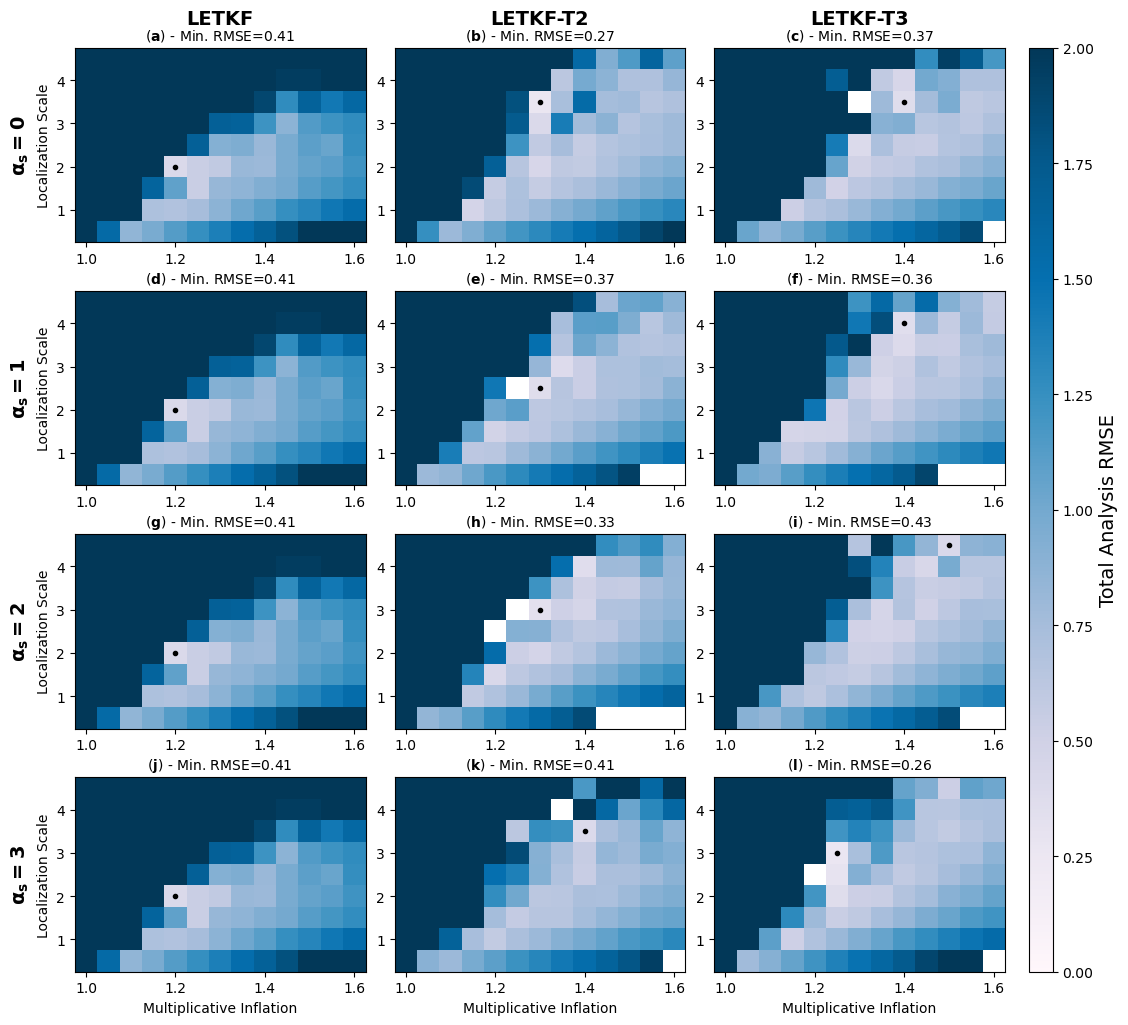

In [13]:
import matplotlib.pyplot as plt
import numpy as np
import os
import common_function as cf
# Configuración

base_path  = '/home/jorge.gacitua/experimentos/L96_multiple_experiments/data/LETKF/'
output_dir = '/home/jorge.gacitua/experimentos/L96_multiple_experiments/figures'
ntemps = [1, 2, 3]
labels = ['LETKF', 'LETKF-T2', 'LETKF-T3']
freq = 4
den = 1.0
alphas = [0,1,2,3]
nen = 20
ObseErr = '5'
gec = '_NOGEC'
fig, axes = plt.subplots(len(alphas), len(ntemps), figsize=(12, 12), 
                         sharex=False, sharey=False, 
                         gridspec_kw={'hspace': 0.25, 'wspace': 0.1})

cbar_ax = fig.add_axes([0.92, 0.11, 0.02, 0.77])  # x, y, width, height
vmin, vmax = 0, 2
panel_label_counter = 0

for i, alpha in enumerate(alphas):
    for j, ntemp in enumerate(ntemps):
        # Load the data
        filename = f'LETKF_Paper_Nature_Freq{freq}_Den{den}_Type3_ObsErr{ObseErr}_Nens{nen}_NTemp{ntemp}_alpha{alpha}{gec}.npz'
        filepath = os.path.join(base_path, filename)
        print(filepath)
        # Check if the file exists
        if os.path.exists(filepath):
            ax = axes[i, j]
            data = np.load(filepath, allow_pickle=True)
            mult_inf_range = data['mult_inf_range']
            loc_scale_range = data['loc_scale_range']
            total_analysis_rmse = data['total_analysis_rmse']

            NormalEnd = 1 - data['NormalEnd']
            NormalEnd = NormalEnd.astype(bool)
            total_analysis_rmse[NormalEnd] = np.nan
            total_analysis_rmse = cf.outlier_rmse_filter( total_analysis_rmse )

            min_rmse = np.nanmin(total_analysis_rmse)
            idx_min = np.where(total_analysis_rmse == min_rmse)
            best_mult_inf = mult_inf_range[idx_min[0][0]]
            best_loc_scale = loc_scale_range[idx_min[1][0]]

            im = ax.pcolormesh(mult_inf_range, loc_scale_range, total_analysis_rmse.T, 
                                vmin=vmin, vmax=vmax, cmap='PuBu',edgecolors='lightgray',linewidth=0.001)
            ax.plot(best_mult_inf, best_loc_scale, 'k.', markersize=6)

            panel_label = rf"$\bf{{{chr(97 + panel_label_counter)}}}$"
            ax.set_title(f"({panel_label}) - Min. RMSE={min_rmse:.2f}", fontsize=10)
            panel_label_counter += 1

            if j == 0:
                ax.set_ylabel('Localization Scale', fontsize=10)
            if i == len(alphas) - 1:
                ax.set_xlabel('Multiplicative Inflation', fontsize=10)

for i, alpha in enumerate(alphas):
    axes[i, 0].annotate(rf"$\bf{{\alpha_s = {alpha}}}$", xy=(-0.15, 0.5), xycoords='axes fraction',
                        rotation=90, va='center', ha='right', fontsize=14, weight='bold')
for j, t in enumerate(ntemps):
    axes[0, j].annotate(labels[j], xy=(0.5, 1.15), xycoords='axes fraction',
                        va='center', ha='center', fontsize=14, weight='bold')
cbar = fig.colorbar(im, cax=cbar_ax)
cbar.set_label('Total Analysis RMSE', fontsize=14)

os.makedirs(output_dir, exist_ok=True)
figname = f"Figure_Alpha_AnalysisRMSE_Freq{freq}_Den{den}_Type3"
output_pdf = os.path.join(output_dir, f"{figname}.pdf")
output_png = os.path.join(output_dir, f"{figname}.png")

plt.savefig(output_pdf, dpi=300, bbox_inches='tight', format='pdf')
plt.savefig(output_png, dpi=300, bbox_inches='tight', format='png')
#plt.show()

print(f"Figure saved as: \n PDF: {output_pdf} \n PNG: {output_png}")